8. Apply edge detection using Canny or Sobel, line detection (using Hough Transform), and corner detection (using Harris) on a sample image. Display the results of each operation sequentially.



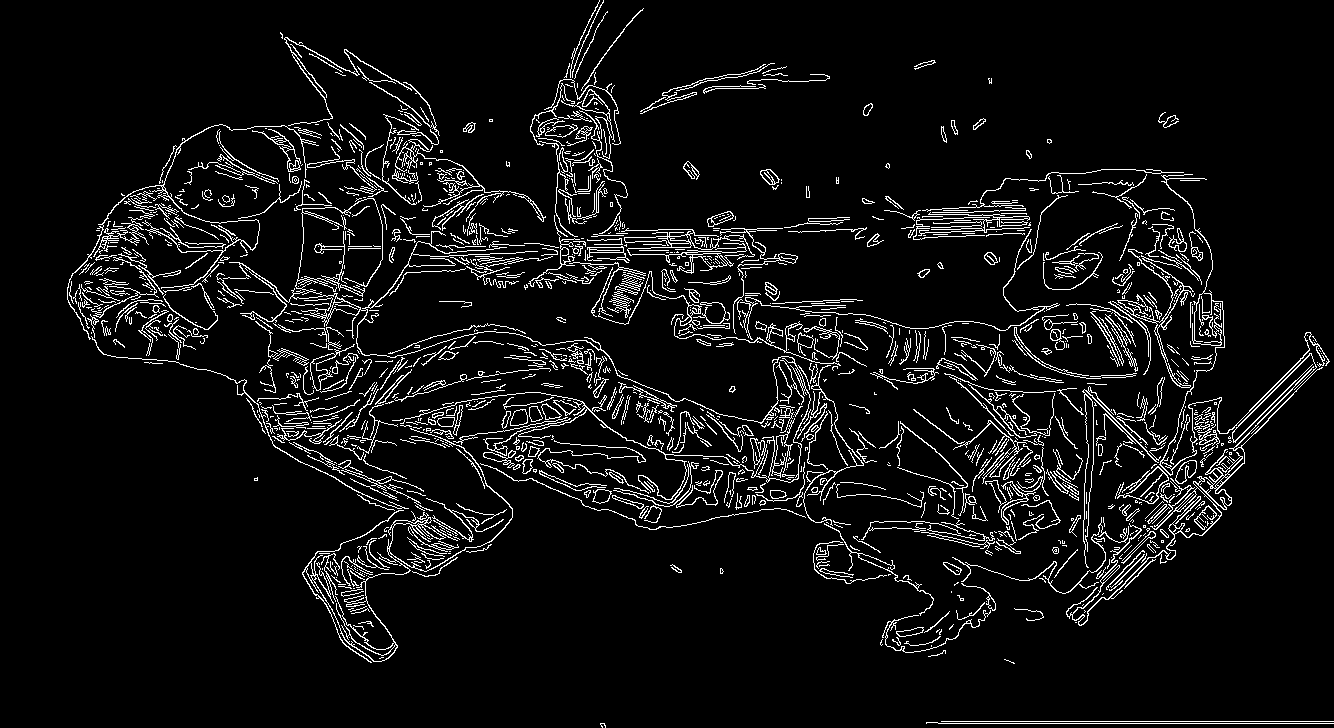

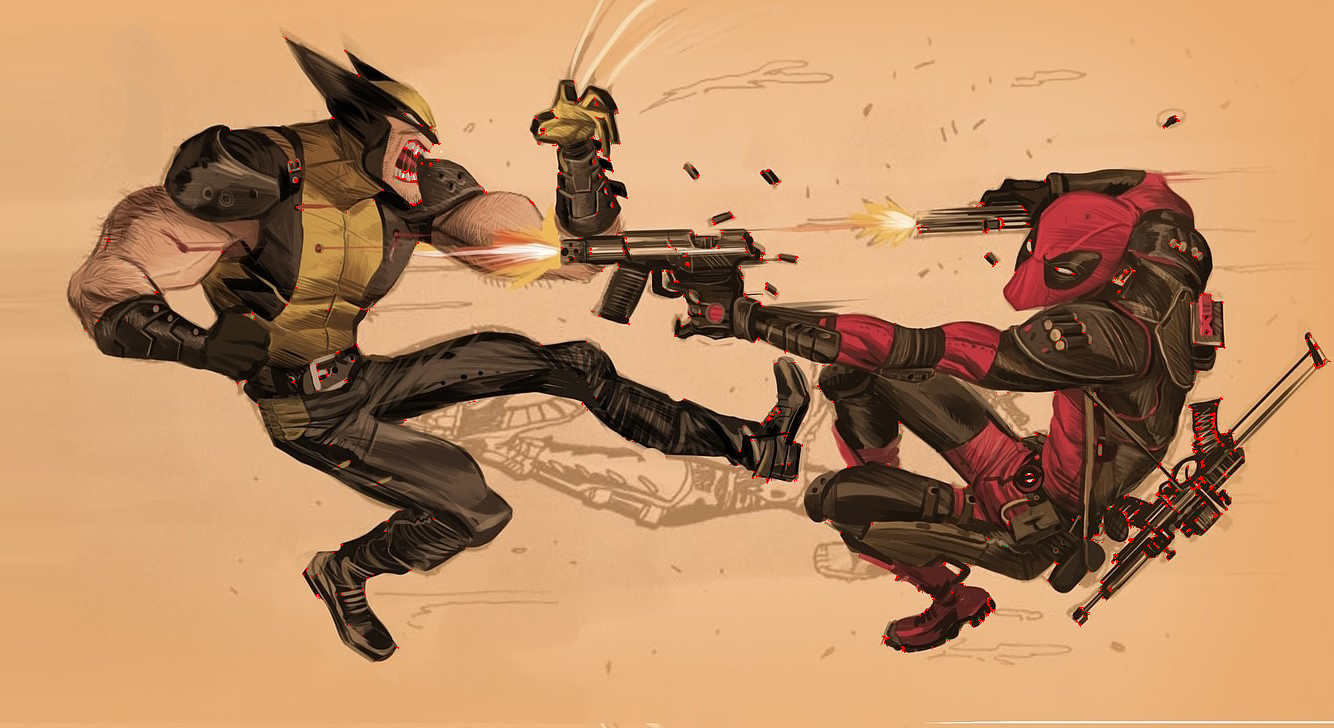

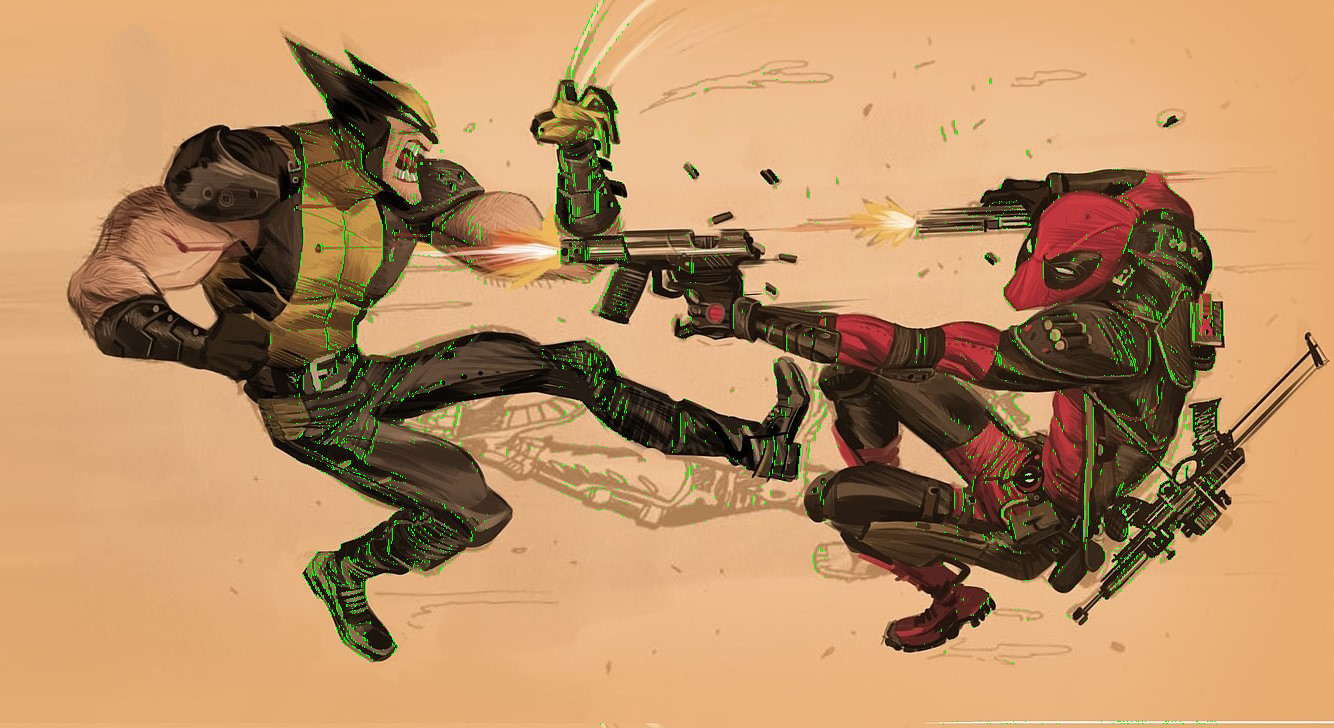

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Read the image
image = cv2.imread('/content/deadpool-wolverine-wallpaper-preview.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Canny Edge Detection
edges = cv2.Canny(gray, 100, 200)

# Harris Corner Detection
corners = cv2.cornerHarris(np.float32(gray), 2, 3, 0.04)
corner_image = image.copy()
corner_image[corners > 0.01 * corners.max()] = [0, 0, 255]  # Highlight corners in red

# Line Detection (Hough Transform - Probabilistic)
line_image = image.copy()
lines = cv2.HoughLinesP(edges, np.pi/180, 100, 50 ,10)

# Draw the detected lines
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]  # Extract line coordinates
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0))  # Green lines


cv2_imshow (edges)
cv2_imshow( corner_image)
cv2_imshow( line_image)
cv2.waitKey(0)
cv2.destroyAllWindows()